In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "SUW"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/baseline

Average verified rate: 0.930803878640141

Average of error rates: 0.08090269400884599

Total token count: 4788173



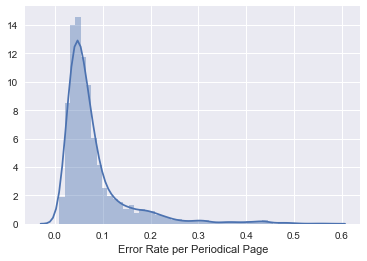

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 500 )

[('r', 13516),
 ('w', 11174),
 ('e', 10465),
 ('br', 8797),
 ('m', 8636),
 ('d', 7710),
 ('-', 6269),
 ('f', 6154),
 ('ñ', 5924),
 ('g', 4774),
 ("'", 4706),
 ('t', 4099),
 ('oo', 3876),
 ('n', 3801),
 ('¥', 2914),
 (')', 2304),
 ('re-', 2095),
 ('con-', 2092),
 ('th', 2084),
 ('bf', 1998),
 ('in-', 1605),
 ('gc', 1377),
 ('ck', 1353),
 ('tion', 1347),
 ('ky', 1278),
 ('ó', 1251),
 ('od', 1152),
 ('be-', 1029),
 ('/', 1029),
 ('de-', 1026),
 ('pp', 1012),
 ('bfl', 960),
 ('ex-', 895),
 ('u', 883),
 ('wm', 858),
 ('ence', 836),
 ('(agts', 804),
 ('ference', 796),
 ('ò', 757),
 ('com-', 743),
 ('en-', 719),
 ('k', 704),
 ("colporteurs'", 700),
 ('confer-', 681),
 ('mis-', 673),
 ('(', 651),
 ('io', 650),
 ('*', 645),
 ('ment', 638),
 ('twenty-cent-a-week', 568),
 ('_', 535),
 ('ers', 518),
 ('ad-', 506),
 ('sab-', 504)]

## Check Special Character Use

In [13]:
reports.tokens_with_special_characters(errors_summary)

[('ñ', 5924),
 ('¥', 2914),
 (')', 2304),
 ('ó', 1251),
 ('/', 1029),
 ('(agts', 804),
 ('ò', 757),
 ('(', 651),
 ('*', 645),
 ('_', 535),
 ('(colored)', 334),
 ('%', 268),
 ('numbers)', 251),
 ('(fifty', 250),
 ('=', 248),
 ('ã', 234),
 ('(white)', 217),
 ('(a', 185),
 ('¡', 184),
 ('—', 178),
 ('”', 172),
 ('õ', 167),
 ('ñselected', 158),
 ('wk)', 148),
 ('•', 146),
 ('[', 144),
 ('godõs', 144),
 ('wk]', 136),
 ('(a)', 134),
 ('(b)', 132),
 ('|', 112),
 (']', 103),
 ('òthe', 96),
 ('¥¥', 86),
 ('ô', 86),
 ('`', 85),
 ('ñthe', 85),
 ('\ufeff', 84),
 ('òi', 82),
 ('(c)', 82),
 ('lordõs', 73),
 ('nameñ', 71),
 ('(the', 63),
 ('ñmrs', 61),
 ('*two', 61),
 ('(signed)', 57),
 ("sec'y¥treasurer", 56),
 ('(col', 55),
 ('(col)', 55),
 ('canvassersõ', 54),
 ("g'dtotals(a", 54),
 ('`the', 51),
 ('donõt', 50),
 ('(to', 50),
 ('(continued', 48),
 ('(d)', 47),
 ('¥¥¥', 46),
 ('ña', 45),
 ('[the', 43),
 ('“', 43),
 ('**', 42),
 ('(concluded', 41),
 ('^', 41),
 ('òwe', 40),
 ('__', 39),
 ('colored)'

## Correction 1 -- Address Accented "o"s

In [15]:
# %load shared_elements/replace_accented_o.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    with open(join(directories['prev'], filename)) as f:
        content = f.read()
        
    content = re.sub(r"(\w+)(õ|Õ)", r"\1'", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction1

Average verified rate: 0.9310001956905066

Average of error rates: 0.08073743466023321

Total token count: 4788173



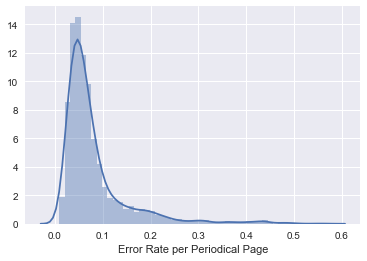

In [18]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [19]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13516),
 ('w', 11174),
 ('e', 10465),
 ('br', 8797),
 ('m', 8636),
 ('d', 7710),
 ('-', 6269),
 ('f', 6154),
 ('ñ', 5924),
 ('g', 4774),
 ("'", 4708),
 ('t', 4099),
 ('oo', 3876),
 ('n', 3801),
 ('¥', 2914),
 (')', 2304),
 ('re-', 2095),
 ('con-', 2092),
 ('th', 2084),
 ('bf', 1998),
 ('in-', 1605),
 ('gc', 1377),
 ('ck', 1353),
 ('tion', 1347),
 ('ky', 1278),
 ('ó', 1251),
 ('od', 1152),
 ('/', 1029),
 ('be-', 1029),
 ('de-', 1026),
 ('pp', 1012),
 ('bfl', 960),
 ('ex-', 895),
 ('u', 883),
 ('wm', 858),
 ('ence', 836),
 ('(agts', 804),
 ('ference', 796),
 ('ò', 757),
 ('com-', 743),
 ("colporteurs'", 734),
 ('en-', 719),
 ('k', 704),
 ('confer-', 681),
 ('mis-', 673),
 ('(', 651),
 ('io', 650),
 ('*', 645),
 ('ment', 638),
 ('twenty-cent-a-week', 568)]

## Correction 2 -- Normalize Characters

In [21]:
# %load shared_elements/normalize_characters.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction2

Average verified rate: 0.9380934729992245

Average of error rates: 0.07288841978287092

Total token count: 4772437



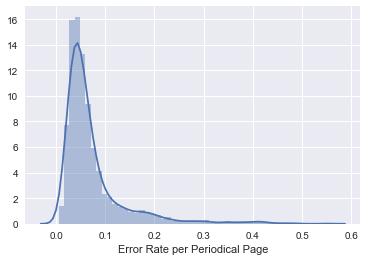

In [24]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [25]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13633),
 ('w', 11294),
 ('e', 10621),
 ('br', 8893),
 ('m', 8726),
 ('d', 7845),
 ('-', 6475),
 ('f', 6238),
 ("'", 4843),
 ('g', 4823),
 ('t', 4247),
 ('oo', 3890),
 ('n', 3876),
 ('th', 2133),
 ('re-', 2100),
 ('con-', 2094),
 ('bf', 2061),
 ('in-', 1614),
 ('gc', 1388),
 ('ck', 1359),
 ('tion', 1350),
 ('ky', 1288),
 ('od', 1155),
 ('be-', 1033),
 ('de-', 1033),
 ('pp', 1030),
 ('bfl', 971),
 ('u', 898),
 ('ex-', 898),
 ('agts', 875),
 ('wm', 864),
 ('ence', 843),
 ('ference', 796),
 ('wk', 763),
 ('com-', 743),
 ("colporteurs'", 736),
 ('k', 728),
 ('en-', 721),
 ('confer-', 682),
 ('mis-', 675),
 ('io', 662),
 ('ment', 639),
 ('twenty-cent-a-week', 575),
 ('ers', 522),
 ('ad-', 507),
 ('sab-', 505),
 ('at-', 502),
 ('meet-', 481),
 ('col-', 460),
 ('x', 460)]

## Correction 3 -- Correct Line Endings

In [27]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction3

Average verified rate: 0.9558221330391822

Average of error rates: 0.05502030558906313

Total token count: 4711409



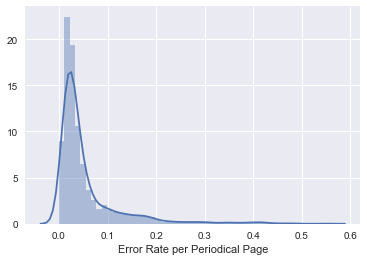

In [30]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [31]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13629),
 ('w', 11292),
 ('e', 10613),
 ('br', 8893),
 ('m', 8725),
 ('d', 7842),
 ('-', 6423),
 ('f', 6236),
 ("'", 4843),
 ('g', 4822),
 ('t', 4244),
 ('oo', 3889),
 ('n', 3873),
 ('th', 2132),
 ('bf', 2061),
 ('gc', 1388),
 ('ck', 1359),
 ('ky', 1288),
 ('od', 1149),
 ('pp', 1029),
 ('bfl', 971),
 ('u', 897),
 ('agts', 875),
 ('wm', 864),
 ("colporteurs'", 766),
 ('wk', 763),
 ('k', 728),
 ('io', 662),
 ('twenty-cent-a-week', 575),
 ('x', 460),
 ("canvassers'", 415),
 ('ords', 413),
 ('bs', 368),
 ('bp', 348),
 ('wks', 336),
 ('co', 334),
 ('sofp', 301),
 ("'the", 301),
 ('hm', 290),
 ('rd', 288),
 ('twenty-fourth', 287),
 ('bracy', 286),
 ('ga', 282),
 ('re', 273),
 ('q', 269),
 ('secretary-treasurer', 262),
 ('pg', 261),
 ('ex', 260),
 ('cx', 255),
 ('--', 252)]

## Correction 4 -- Remove Extra Dashes

In [33]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SUW19070702-V01-01-page1.txt: [('-be', 'be'), ('stars-foli.u.-', 'stars-foli.u.')]
SUW19070702-V01-01-page2.txt: [('.-', '.'), ('-nay', 'nay')]
SUW19070702-V01-01-page3.txt: [('--', '-'), ('know-', 'know'), ('REPORT-', 'REPORT')]
SUW19070702-V01-01-page4.txt: [('-', ''), ('-it', 'it'), ('vic-', 'vic'), ('CON-', 'CON')]
SUW19070702-V01-01-page5.txt: [('-', '')]
SUW19070702-V01-01-page6.txt: [('-we', 'we'), ('BRANDON-', 'BRANDON'), ('-', ''), ('bor-', 'bor'), ('-', ''), ('-', ''), ('-', '')]
SUW19070702-V01-01-page7.txt: [('-comes', 'comes')]
SUW19070702-V01-01-page8.txt: [('-', ''), ('-NASH.', 'NASH.'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('camp-meet-', 'camp-meet'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', '')]
SUW19070716-V01-02-page1.txt: [('re-', 're')]
SUW19070716-V01-02-page2.txt: [('-and', 'and'), ('-', '')]
SUW19070716-V01-02-page4.txt: [('MEET-', 'MEET')]
SUW19070716-V01-02-page5.txt: [('-book', 'book'), ('possibili-', 'possibili')]
SUW19070716-V01-0

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction4

Average verified rate: 0.9595301817445692

Average of error rates: 0.051165661439485324

Total token count: 4722507



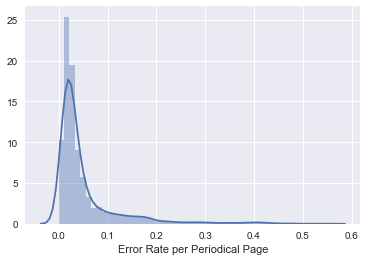

In [36]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13689),
 ('w', 11325),
 ('e', 10685),
 ('br', 8901),
 ('m', 8758),
 ('d', 7871),
 ('f', 6276),
 ("'", 4947),
 ('g', 4845),
 ('t', 4345),
 ('n', 3901),
 ('oo', 3895),
 ('th', 2157),
 ('bf', 2077),
 ('gc', 1391),
 ('ck', 1364),
 ('ky', 1289),
 ('od', 1153),
 ('pp', 1036),
 ('bfl', 975),
 ('u', 900),
 ('agts', 875),
 ('wm', 867),
 ("colporteurs'", 766),
 ('wk', 765),
 ('k', 734),
 ('io', 668),
 ('co', 586),
 ('x', 471),
 ("canvassers'", 417),
 ('ords', 413),
 ('re', 399),
 ('bs', 368),
 ('bp', 349),
 ('wks', 336),
 ('twenty-cent-a-week', 311),
 ('sofp', 301),
 ("'the", 301),
 ('ex', 298),
 ('hm', 291),
 ('rd', 288),
 ('bracy', 286),
 ('ga', 284),
 ('q', 271),
 ('pg', 262),
 ('cx', 256),
 ('cc', 249),
 ('billups', 228),
 ('ro', 228),
 ('chastain', 228)]

## Correction 5 -- Remove extra quotation marks

In [39]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SUW19070702-V01-01-page1.txt: [("'Organ.", 'Organ.'), ("'We", 'We'), ("'the", 'the'), ("'Lit'a", 'Lita'), ("'Be", 'Be'), ('\'"', '"'), ("'for", 'for')]
SUW19070702-V01-01-page5.txt: [("'victories", 'victories')]
SUW19070702-V01-01-page8.txt: [("'but", 'but'), ("'campers", 'campers')]
SUW19070716-V01-02-page3.txt: [("'should", 'should')]
SUW19070716-V01-02-page8.txt: [("'RATES", 'RATES')]
SUW19070730-V01-03-page3.txt: [("'to", 'to')]
SUW19070730-V01-03-page5.txt: [("'is", 'is')]
SUW19070730-V01-03-page7.txt: [("'I", 'I'), ("'Coming", 'Coming'), ("'us", 'us')]
SUW19070730-V01-03-page8.txt: [("'wrong", 'wrong')]
SUW19070813-V01-04-page3.txt: [("'We", 'We'), ("'have", 'have')]
SUW19070813-V01-04-page7.txt: [("'of", 'of'), ("'tis", 'tis'), ("'tis", 'tis'), ("'BFL", 'BFL')]
SUW19070827-V01-05-page1.txt: [("'the", 'the'), ("'lumber", 'lumber'), ("'combinations.", 'combinations.')]
SUW19070827-V01-05-page2.txt: [('\'"', '"')]
SUW19070827-V01-05-page4.txt: [("'September", 'September'), ("'board

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction5

Average verified rate: 0.9606655978668613

Average of error rates: 0.04999638118214717

Total token count: 4722431



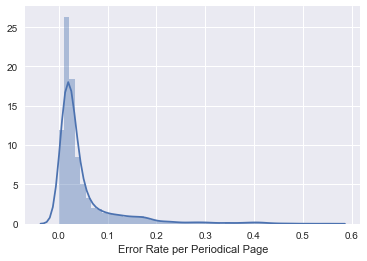

In [42]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13695),
 ('w', 11331),
 ('e', 10698),
 ('br', 8910),
 ('m', 8772),
 ('d', 7886),
 ('f', 6290),
 ('g', 4851),
 ("'", 4685),
 ('t', 4396),
 ('n', 3918),
 ('oo', 3897),
 ('th', 2159),
 ('bf', 2081),
 ('gc', 1391),
 ('ck', 1364),
 ('ky', 1289),
 ('od', 1158),
 ('pp', 1036),
 ('bfl', 976),
 ('u', 900),
 ('agts', 875),
 ('wm', 871),
 ('wk', 768),
 ("colporteurs'", 761),
 ('k', 735),
 ('io', 668),
 ('co', 589),
 ('x', 471),
 ('re', 414),
 ('ords', 413),
 ("canvassers'", 413),
 ('bs', 368),
 ('bp', 349),
 ('wks', 337),
 ('twenty-cent-a-week', 311),
 ('sofp', 301),
 ('ex', 298),
 ('hm', 292),
 ('rd', 288),
 ('bracy', 286),
 ('ga', 284),
 ('q', 271),
 ('pg', 262),
 ('cx', 256),
 ('cc', 249),
 ('ro', 229),
 ('billups', 228),
 ('chastain', 228),
 ('seventhday', 215)]

## Correction 6 -- Rejoin Split Words

In [45]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SUW19070702-V01-01-page8.txt: [('Bi', 'weekly')]
SUW19070716-V01-02-page1.txt: [('re', 'No')]
SUW19070716-V01-02-page2.txt: [('pre', 'pared'), ('proclama', 'tion')]
SUW19070716-V01-02-page8.txt: [('BI', 'WEEKLY'), ('co', 'operation')]
SUW19070730-V01-03-page3.txt: [('CIRCUM', 'STANCES')]
SUW19070730-V01-03-page8.txt: [('BI', 'WEEKLY'), ('pers', 'on')]
SUW19070813-V01-04-page4.txt: [('co', 'operate')]
SUW19070813-V01-04-page6.txt: [('Pa', 'mphlets'), ('co', 'operate')]
SUW19070813-V01-04-page7.txt: [('BR', 'o')]
SUW19070813-V01-04-page8.txt: [('BI', 'WEEKLY'), ('ASSOCIA', 'TION')]
SUW19070827-V01-05-page5.txt: [('RE', 'PORT')]
SUW19070827-V01-05-page7.txt: [('Mc', 'Rae')]
SUW19070827-V01-05-page8.txt: [('BI', 'WEEKLY')]
SUW19070910-V01-06-page8.txt: [('BI', 'WEEKLY')]
SUW19070924-V01-07-page4.txt: [('MIS', 'SIONARY')]
SUW19070924-V01-07-page7.txt: [('ro', 'W'), ('oo', 'H')]
SUW19070924-V01-07-page8.txt: [('BI', 'WEEKLY')]
SUW19071008-V01-08-page2.txt: [('RESOLU', 'TIONS')]
SUW19071008-V

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction6

Average verified rate: 0.9615059628562554

Average of error rates: 0.0491875753920386

Total token count: 4719718



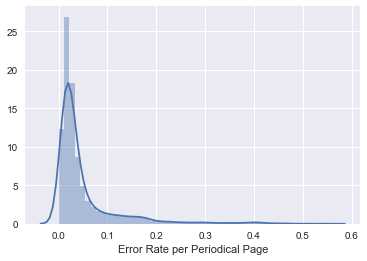

In [48]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [49]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13573),
 ('w', 11328),
 ('e', 10615),
 ('m', 8766),
 ('br', 8725),
 ('d', 7868),
 ('f', 6286),
 ('g', 4846),
 ("'", 4685),
 ('t', 4373),
 ('oo', 3874),
 ('n', 3841),
 ('th', 2088),
 ('bf', 2081),
 ('gc', 1385),
 ('ck', 1363),
 ('ky', 1288),
 ('od', 1150),
 ('pp', 1034),
 ('bfl', 976),
 ('u', 894),
 ('agts', 875),
 ('wm', 859),
 ('wk', 768),
 ("colporteurs'", 761),
 ('k', 716),
 ('io', 644),
 ('x', 459),
 ("canvassers'", 413),
 ('ords', 413),
 ('bs', 367),
 ('bp', 345),
 ('wks', 337),
 ('co', 320),
 ('twenty-cent-a-week', 311),
 ('sofp', 301),
 ('rd', 288),
 ('bracy', 286),
 ('hm', 286),
 ('ga', 281),
 ('q', 270),
 ('pg', 262),
 ('cx', 256),
 ('cc', 249),
 ('ex', 229),
 ('billups', 228),
 ('chastain', 228),
 ('seventhday', 215),
 ('ro', 214),
 ("bookmen's", 213)]

## Review Remaining Errors

In [50]:
reports.docs_with_high_error_rate(summary)

[('SUW19200701-V14-28-page5.txt', 0.549),
 ('SUW19190807-V13-32-page5.txt', 0.509),
 ('SUW19200708-V14-29-page4.txt', 0.468),
 ('SUW19190807-V13-32-page4.txt', 0.466),
 ('SUW19200722-V14-31-page4.txt', 0.465),
 ('SUW19140917-V08-38-page6.txt', 0.459),
 ('SUW19190710-V13-29-page4.txt', 0.458),
 ('SUW19140903-V08-36-page6.txt', 0.447),
 ('SUW19200101-V14-02-page5.txt', 0.444),
 ('SUW19190724-V13-31-page4.txt', 0.442),
 ('SUW19190703-V13-28-page4.txt', 0.439),
 ('SUW19140709-V08-28-page6.txt', 0.434),
 ('SUW19190724-V13-31-page5.txt', 0.432),
 ('SUW19200429-V14-19-page5.txt', 0.426),
 ('SUW19200101-V14-02-page4.txt', 0.423),
 ('SUW19140903-V08-36-page7.txt', 0.423),
 ('SUW19190821-V13-34-page5.txt', 0.421),
 ('SUW19200527-V14-23-page4.txt', 0.42),
 ('SUW19140924-V08-39-page7.txt', 0.419),
 ('SUW19140625-V08-26-page7.txt', 0.415),
 ('SUW19140709-V08-28-page7.txt', 0.414),
 ('SUW19140702-V08-27-page6.txt', 0.414),
 ('SUW19140924-V08-39-page6.txt', 0.412),
 ('SUW19130731-V07-30-page7.txt', 0

In [52]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.45]

utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

SUW19200701-V14-28-page5.txt

SUW19190807-V13-32-page5.txt

SUW19200708-V14-29-page4.txt

SUW19190807-V13-32-page4.txt

SUW19200722-V14-31-page4.txt

SUW19140917-V08-38-page6.txt

SUW19190710-V13-29-page4.txt



Pages 4 and 5 are consistently tables with the names of distributors.

In [54]:
reports.long_errors(errors_summary, min_length=15)

(['adientistschools',
  "l'iommmmlummmismmum",
  'stick-to-itiveness',
  'god-doing-as-he-likes',
  'recently-erected',
  'mmillimmulitmtiiiiolinwrj',
  'postmaster-general',
  'lintrtimitlimmilmalitoniiiiitoliixoniinimatimixgifink',
  'extra-constitutional',
  'absurtfitleavtio',
  'acterwhichfvitlgivemeanentrance',
  'tilinisseriously',
  'reportofwatchmanworkers',
  'trans-continental',
  "seventh-day'adventists",
  'altra-sensativeness',
  'our--institutions',
  'walltteerrbbrorwownn',
  'emeliarobersongc',
  'superintendent-and',
  'student-colporteurs',
  'iongaassociaiion',
  'five-dollar-a-member',
  'mounamiwommunnumunnwimurnotittiun',
  'iiiiiiiiiiiiiiiiiiikiiiiiiiiiiii',
  'conferencechurch',
  'ainallyjiniinclethisaiat',
  'two-cent-imental',
  'theinostsuccessful',
  'placingbindingordersfornearly',
  'sollatirc-triviorr',
  'wouldbegladtohearoftheprogressmade',
  'walteredmondsfer',
  'willgivethenamesnextweek',
  'five-hundreddollar',
  'efikageriiieither',
  'soijthrnij

## Correction 7 -- Remove long repeating errors

In [56]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(clean.check_for_repeating_characters(tokens, "r|R"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SUW19160106-V10-01-page8.txt: [('lommmiumminmemiumnimmignimunsuovomou', ' ')]
SUW19160323-V10-12-page8.txt: [('iiiiiiiiiiiirm', ' ')]
SUW19160720-V10-29-page1.txt: [('EIIIIIIIIIIIMMINIII', ' '), ('IIImilniMMIIMINUMNIMIIII', ' ')]
SUW19160720-V10-29-page6.txt: [('.MUMMTM..M.MWM.IIIMMMM.MMUMMII', ' ')]
SUW19160727-V10-30-page4.txt: [('.numanadernommoonnammommunmitmonnummonommumnrmiimmtmmunommommum"', ' ')]
SUW19160727-V10-30-page5.txt: [('gmmummunsimimmiummaiumumugmumummlominwninnimmunimultamantimmtitnommtmk', ' ')]
SUW19160810-V10-31-page5.txt: [('MMMIUMMIMIAMMMMMMMITNNUMMNIMIMMUMMEMMIEMMMMMM', ' ')]
SUW19160810-V10-31-page9.txt: [('ommaniAlMillmoimomiailiiiiummimommomntimiiimiiiiinomnimmluniiinMnimmlumionrmoonnaimairmalrumulanutt.', ' '), ('ommaniAlMillmoimomiailiiiiummimommomntimiiimiiiiinomnimmluniiinMnimmlumionrmoonnaimairmalrumulanutt.', ' ')]
SUW19161019-V10-41-page6.txt: [('ifilliallEIMMIMOINIMMIIMMIffillice', ' '), ('ifilliallEIMMIMOINIMMIIMMIffillice', ' ')]
SUW19161109-V10-44-

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction7

Average verified rate: 0.9615479149318468

Average of error rates: 0.049118214716525936

Total token count: 4719510



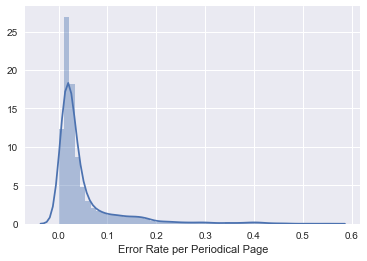

In [59]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [60]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13573),
 ('w', 11326),
 ('e', 10614),
 ('m', 8754),
 ('br', 8725),
 ('d', 7868),
 ('f', 6286),
 ('g', 4846),
 ("'", 4685),
 ('t', 4373),
 ('oo', 3874),
 ('n', 3841),
 ('th', 2088),
 ('bf', 2081),
 ('gc', 1385),
 ('ck', 1363),
 ('ky', 1288),
 ('od', 1150),
 ('pp', 1034),
 ('bfl', 976),
 ('u', 891),
 ('agts', 875),
 ('wm', 859),
 ('wk', 768),
 ("colporteurs'", 761),
 ('k', 716),
 ('io', 644),
 ('x', 459),
 ("canvassers'", 413),
 ('ords', 413),
 ('bs', 367),
 ('bp', 345),
 ('wks', 337),
 ('co', 320),
 ('twenty-cent-a-week', 311),
 ('sofp', 301),
 ('rd', 288),
 ('bracy', 286),
 ('hm', 286),
 ('ga', 281),
 ('q', 270),
 ('pg', 262),
 ('cx', 256),
 ('cc', 249),
 ('ex', 229),
 ('billups', 228),
 ('chastain', 228),
 ('seventhday', 215),
 ('ro', 214),
 ("bookmen's", 213)]

## Correction 8 -- Separate Squashed Words

In [62]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SUW19071022-V01-09-page5.txt: [('Theaboverecomhforurt', 'The a b o v ere com h for ur t'), ('andoneashighasfourteen', 'and one as high as fourteen')]
SUW19071217-V01-13-page8.txt: [('certificatereceipts', 'certificate receipts')]
SUW19080211-V02-03-page2.txt: [('standingcommittees', 'standing committees')]
SUW19080225-V02-05-page16.txt: [('Orthesedepartments', 'Or these departments')]
SUW19080303-V02-06-page2.txt: [('prolongedcorrespondence', 'prolonged correspondence')]
SUW19080407-V02-11-page2.txt: [('counterattractions', 'counter attractions')]
SUW19080407-V02-11-page4.txt: [('fVivsiistitnigngthbeaislidc', 'f V i v s i i s t i t n i g n g t h b e a i s l i d c')]
SUW19080421-V02-13-page7.txt: [('IVIBERLANNDIisCcON', 'I VI B ER L AN N D I i s C c O N')]
SUW19080526-V02-18-page3.txt: [('REPORTOFWATCHMANWORKERS', 'REPORT OF WATCHMAN WORKERS')]
SUW19080609-V02-20-page4.txt: [('Christianityagainst', 'Christianity against')]
SUW19081006-V02-37-page2.txt: [('providinghealthful', 'providing

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SUW/correction8

Average verified rate: 0.9615643026562551

Average of error rates: 0.049089465219139525

Total token count: 4721158



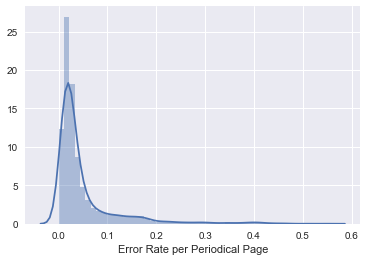

In [65]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [66]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('r', 13596),
 ('w', 11331),
 ('e', 10650),
 ('m', 8790),
 ('br', 8725),
 ('d', 7878),
 ('f', 6304),
 ('g', 4856),
 ("'", 4685),
 ('t', 4423),
 ('n', 3887),
 ('oo', 3874),
 ('th', 2088),
 ('bf', 2081),
 ('gc', 1385),
 ('ck', 1363),
 ('ky', 1288),
 ('od', 1150),
 ('pp', 1034),
 ('bfl', 976),
 ('u', 913),
 ('agts', 875),
 ('wm', 859),
 ('wk', 768),
 ("colporteurs'", 761),
 ('k', 724),
 ('io', 644),
 ('x', 462),
 ("canvassers'", 413),
 ('ords', 413),
 ('bs', 367),
 ('bp', 345),
 ('wks', 337),
 ('co', 320),
 ('twenty-cent-a-week', 311),
 ('sofp', 301),
 ('rd', 288),
 ('bracy', 286),
 ('hm', 286),
 ('ga', 281),
 ('q', 270),
 ('pg', 262),
 ('cx', 256),
 ('cc', 249),
 ('ex', 229),
 ('billups', 228),
 ('chastain', 228),
 ('seventhday', 215),
 ('ro', 214),
 ("bookmen's", 213)]